# **Exploratory Data Analysis in Python**

#### In this Jupyter notebook, I will be showing you how to perform Exploratory Data Analysis on web scraped data of NBA player stats.

## **Web scraping data using pandas**

The following block of code will retrieve the "2019-20 NBA Player Stats: Per Game" data from http://www.basketball-reference.com/.

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

# Retrieve HTML table data
url = 'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'
html = pd.read_html(url, header = 0)
df2020 = html[0]
df2020

# Data cleaning
raw = df2020.drop(df2020[df2020.Age == 'Age'].index)
raw

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,525,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,...,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
673,526,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,...,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
674,527,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,...,NaN,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
675,528,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,...,.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


## **Acronyms**


Acronym | Description
---|---
Rk | Rank
Pos | Position
Age | Player's age on February 1 of the season
Tm | Team
G | Games
GS | Games Started
MP | Minutes Played Per Game
FG | Field Goals Per Game
FGA | Field Goal Attempts Per Game
FG% | Field Goal Percentage
3P | 3-Point Field Goals Per Game
3PA | 3-Point Field Goal Attempts Per Game
3P% | FG% on 3-Pt FGAs.
2P | 2-Point Field Goals Per Game
2PA | 2-Point Field Goal Attempts Per Game
2P% | FG% on 2-Pt FGAs.
eFG% | Effective Field Goal Percentage
| *(Note: This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.)*
FT | Free Throws Per Game
FTA | Free Throw Attempts Per Game
FT% | Free Throw Percentage
ORB | Offensive Rebounds Per Game
DRB | Defensive Rebounds Per Game
TRB | Total Rebounds Per Game
AST | Assists Per Game
STL | Steals Per Game
BLK | Blocks Per Game
TOV | Turnovers Per Game
PF | Personal Fouls Per Game
PTS | Points Per Game

## Data Cleaning

In [2]:
raw.shape

(651, 30)

In [3]:
raw.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


In [4]:
raw.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

### Missing Value Checking

In [5]:
raw.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        2
3P         0
3PA        0
3P%       35
2P         0
2PA        0
2P%        6
eFG%       2
FT         0
FTA        0
FT%       33
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

#### We can notice that FG%, 3P%, 2P%, eFG% and FT% have null values

### Replace missing values with 0

In [6]:
df = raw.fillna(0)

In [7]:
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [8]:
df = df.drop(['Rk'], axis=1)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,.500,...,0,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,.437,...,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
673,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,.524,...,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
674,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,.250,...,0,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
675,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,.569,...,.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


## Data types of each columns in the dataframe

In [9]:
df.dtypes

Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
dtype: object

## Exploratory Data Analysis

In [10]:
df.to_csv('nba.csv', index=False)

In [11]:
df = pd.read_csv('nba.csv')

In [12]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,0.500,...,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
647,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,0.524,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
648,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,0.250,...,0.000,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
649,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,0.569,...,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [13]:
df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

### Specific Data Types

In [14]:
df.select_dtypes(include=['number'])

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,26,63,63,26.7,4.5,7.6,0.592,0.0,0.0,0.333,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,22,72,72,33.6,6.1,11.0,0.557,0.0,0.2,0.143,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,34,53,53,33.1,7.4,15.0,0.493,1.2,3.0,0.389,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,23,2,0,6.5,0.5,1.0,0.500,0.0,0.0,0.000,...,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,21,47,1,12.6,2.1,5.7,0.368,1.0,2.8,0.346,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,21,60,60,35.3,9.1,20.8,0.437,3.4,9.5,0.361,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
647,27,58,39,23.1,4.3,8.3,0.524,0.3,1.3,0.240,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
648,30,2,0,2.0,0.5,2.0,0.250,0.0,0.0,0.000,...,0.000,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
649,23,22,0,10.0,1.9,3.3,0.569,0.0,0.0,0.000,...,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [15]:
df.select_dtypes(include=['object'])

,Player,Pos,Tm
0,Steven Adams,C,OKC
1,Bam Adebayo,PF,MIA
2,LaMarcus Aldridge,C,SAS
3,Kyle Alexander,PF,MIA
4,Nickeil Alexander-Walker,SG,NOP
...,...,...,...
646,Trae Young,PG,ATL
647,Cody Zeller,C,CHO
648,Tyler Zeller,C,SAS
649,Ante Žižić,C,CLE


### Conditional Selections

#### Which player scored the most Points (PTS) Per Game? Here, we will return the entire row.

In [16]:
df[df.PTS == df.PTS.max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
257,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,0.444,...,0.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3


In [17]:
# Only showing PTS column of maximum PTS  

PlayerMaxPts = df[df.PTS == df.PTS.max()]
PlayerMaxPts.PTS

257    34.3
Name: PTS, dtype: float64

###### Further question, what team is the player from?

In [18]:
PlayerMaxPoints = df[df.PTS == df.PTS.max()]
PlayerMaxPoints.Tm

257    HOU
Name: Tm, dtype: object

###### Which position is the player playing as?

In [19]:
PlayerMaxPoints.Pos

257    SG
Name: Pos, dtype: object

###### How many games did the player played in the season?

In [20]:
PlayerMaxPoints.G

257    68
Name: G, dtype: int64

###### Which player scored more than 25 Points (PTS) Per Game?

In [21]:
df[df.PTS > 25]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
12,Giannis Antetokounmpo,PF,25,MIL,63,63,30.4,10.9,19.7,0.553,...,0.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5
40,Bradley Beal,SG,26,WAS,57,57,36.0,10.4,22.9,0.455,...,0.842,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5
68,Devin Booker,SG,23,PHO,70,70,35.9,9.0,18.3,0.489,...,0.919,0.4,3.8,4.2,6.5,0.7,0.3,3.8,3.0,26.6
162,Anthony Davis,PF,26,LAL,62,62,34.4,8.9,17.7,0.503,...,0.846,2.3,7.0,9.3,3.2,1.5,2.3,2.5,2.5,26.1
177,Luka Dončić,PG,20,DAL,61,61,33.6,9.5,20.6,0.463,...,0.758,1.3,8.1,9.4,8.8,1.0,0.2,4.3,2.5,28.8
257,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,0.444,...,0.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3
308,Kyrie Irving,PG,27,BRK,20,20,32.9,10.0,20.8,0.478,...,0.922,1.1,4.1,5.2,6.4,1.4,0.5,2.6,2.7,27.4
319,LeBron James,PG,35,LAL,67,67,34.6,9.6,19.4,0.493,...,0.693,1.0,6.9,7.8,10.2,1.2,0.5,3.9,1.8,25.3
363,Zach LaVine,SG,24,CHI,60,60,34.8,9.0,20.0,0.450,...,0.802,0.7,4.1,4.8,4.2,1.5,0.5,3.4,2.2,25.5
373,Kawhi Leonard,SF,28,LAC,57,57,32.4,9.3,19.9,0.470,...,0.886,0.9,6.1,7.1,4.9,1.8,0.6,2.6,2.0,27.1


###### Which player had the highest 3-Point Field Goals Per Game (3P) ?

In [22]:
df[df['3P'] == df['3P'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
257,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,0.444,...,0.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3


In [23]:
Max3P = df[df['3P'] == df['3P'].max()]
Max3P['3P']

257    4.4
Name: 3P, dtype: float64

###### Which player had the highest Assists Per Game (AST) ?

In [24]:
df[df['AST'] == df['AST'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
319,LeBron James,PG,35,LAL,67,67,34.6,9.6,19.4,0.493,...,0.693,1.0,6.9,7.8,10.2,1.2,0.5,3.9,1.8,25.3


In [25]:
MaxAst = df[df['AST'] == df['AST'].max()]
MaxAst['AST']

319    10.2
Name: AST, dtype: float64

### GroupBy() function

###### Which player scored the highest (PTS) in the Memphis Grizzlies?

In [26]:
MEM = df.groupby('Tm').get_group('MEM')

In [27]:
MEM[MEM.PTS == MEM.PTS.max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
431,Ja Morant,PG,20,MEM,67,67,31.0,6.7,14.0,0.477,...,0.776,0.8,3.1,3.9,7.3,0.9,0.3,3.3,1.6,17.8


###### Of the 5 positions, which position scores the most points?

We first group players by their positions.

In [28]:
df.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,110.0,8.342727,5.214983,0.0,4.725,7.40,11.100,26.5
C-PF,2.0,3.450000,0.353553,3.2,3.325,3.45,3.575,3.7
PF,136.0,7.793382,6.219661,0.0,3.175,5.90,11.525,29.5
PF-C,2.0,10.900000,2.121320,9.4,10.150,10.90,11.650,12.4
PG,111.0,10.020721,7.119999,0.5,4.900,7.70,13.100,30.0
SF,113.0,7.913274,5.675441,0.0,3.900,6.40,10.500,27.1
SF-PF,4.0,5.950000,7.239015,1.1,2.075,3.00,6.875,16.7
SF-SG,3.0,11.233333,9.584536,3.1,5.950,8.80,15.300,21.8
SG,170.0,8.458824,6.329845,0.0,3.350,7.10,11.975,34.3


We will now show only the 5 traditional positions (those having combo positions will be removed from the analysis).

In [29]:
positions = ['C','PF','SF','PG','SG']
POS = df[ df['Pos'].isin(positions)  ]
POS

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,0.500,...,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
647,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,0.524,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
648,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,0.250,...,0.000,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
649,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,0.569,...,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [30]:
POS.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,110.0,8.342727,5.214983,0.0,4.725,7.4,11.100,26.5
PF,136.0,7.793382,6.219661,0.0,3.175,5.9,11.525,29.5
PG,111.0,10.020721,7.119999,0.5,4.900,7.7,13.100,30.0
SF,113.0,7.913274,5.675441,0.0,3.900,6.4,10.500,27.1
SG,170.0,8.458824,6.329845,0.0,3.350,7.1,11.975,34.3


## Data Visualization

In [31]:
PTS = df[['Pos','PTS']]

positions = ['C','PF','SF','PG','SG']
PTS = PTS[PTS['Pos'].isin(positions)]

PTS

,Pos,PTS
0,C,10.9
1,PF,15.9
2,C,18.9
3,PF,1.0
4,SG,5.7
...,...,...
646,PG,29.6
647,C,11.1
648,C,1.0
649,C,4.4


### Histplot / Histogram

#### Visualization Of PTS and Pos

<AxesSubplot:xlabel='Pos', ylabel='Count'>

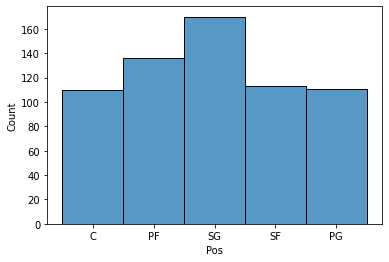

In [32]:
sns.histplot(PTS, x='Pos')

<AxesSubplot:xlabel='PTS', ylabel='Count'>

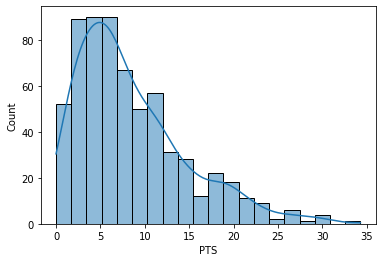

In [33]:
sns.histplot(PTS, x='PTS', kde=True)

#### Individual histogram of selected Pos by PTS count

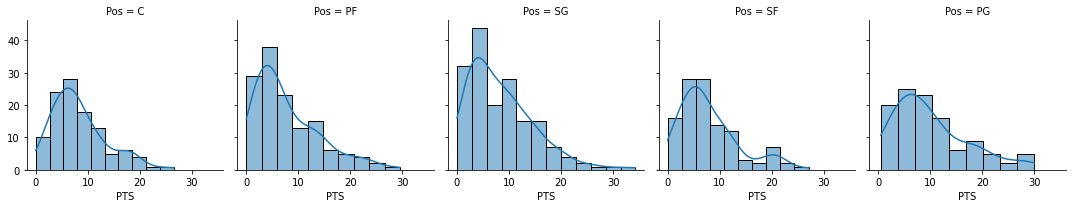

In [34]:
g = sns.FacetGrid(PTS, col="Pos")
g.map(sns.histplot, "PTS", kde=True);

##### Visualization Of Teams and Points: 
##### Tm(MEM, HOU & LAL)  VS.  PTS of (MEM, HOU & LAL)

In [35]:
PTS1 = df[['Tm','PTS']]

teams = ['HOU','MEM','LAL']
PTS1 = PTS1[PTS1['Tm'].isin(teams)]

PTS1

,Tm,PTS
5,MEM,8.7
10,MEM,5.8
11,HOU,2.5
13,LAL,1.4
47,MEM,5.0
...,...,...
589,MEM,1.0
591,MEM,14.9
606,LAL,11.9
617,MEM,2.0


<AxesSubplot:xlabel='PTS', ylabel='Count'>

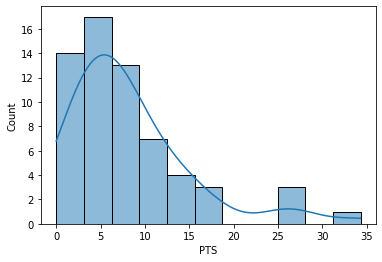

In [37]:
# All PTS made by MEM, LAL & HOU

sns.histplot(PTS1, x='PTS', kde=True)

#### Individual histogram of MEM, LAL & HOU by their PTS count

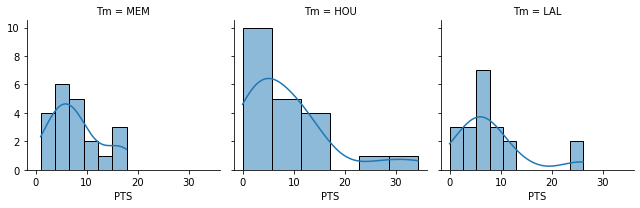

In [38]:
g1 = sns.FacetGrid(PTS1, col="Tm")
g1.map(sns.histplot, "PTS", kde=True);

### Counts of Players from A Particular Team

In [98]:
grps = df.groupby('Tm')
grps.PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Tm,,,,,,,,
ATL,21.0,8.185714,7.018923,0.0,3.300,5.80,10.500,29.6
BOS,17.0,8.747059,7.297099,1.9,3.400,5.20,12.900,23.4
BRK,24.0,8.633333,6.362845,0.4,4.550,6.50,11.325,27.4
CHI,17.0,8.735294,5.664025,2.5,4.900,7.30,11.300,25.5
CHO,16.0,8.350000,5.034415,0.5,5.450,6.45,11.375,18.2
CLE,21.0,7.590476,6.366781,0.0,2.000,5.00,12.000,20.8
DAL,19.0,8.952632,6.872923,0.9,4.850,7.70,10.750,28.8
DEN,21.0,7.571429,5.467645,1.1,3.100,5.80,10.400,19.9
DET,22.0,8.872727,5.596868,1.0,3.875,8.95,12.775,18.1


## Average Points by All Teams in dataset

Text(0, 0.5, 'Points')

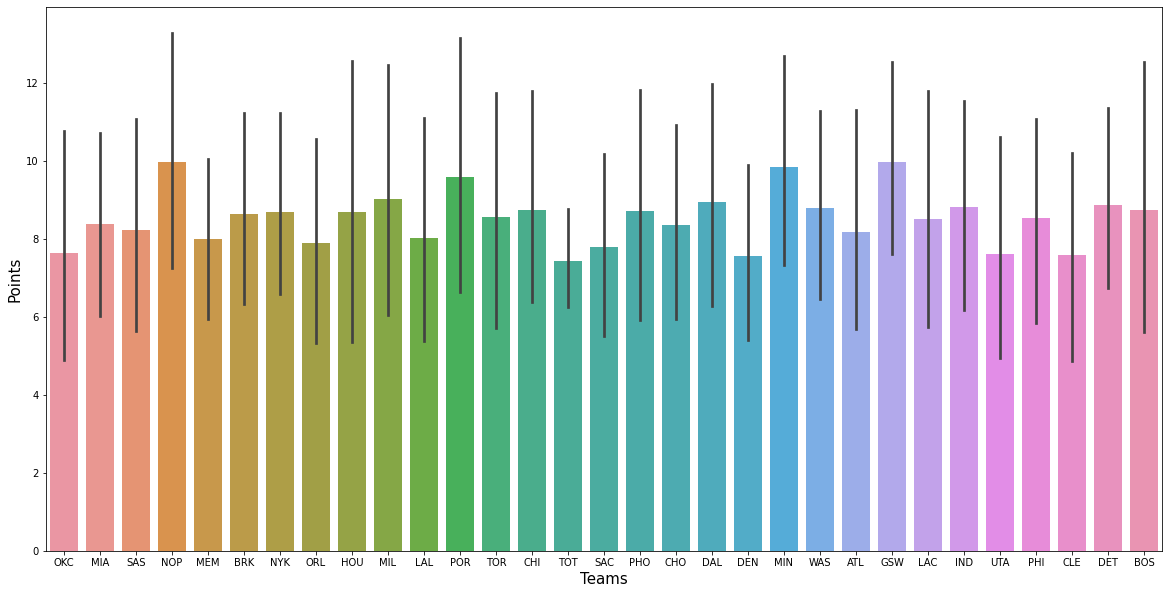

In [125]:
plt.subplots(figsize=(20, 10))

sns.barplot(x="Tm", y="PTS", data=df)
plt.xlabel("Teams", size=15)
plt.ylabel("Points", size=15)

### Box Plot

#### Point group by Position

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

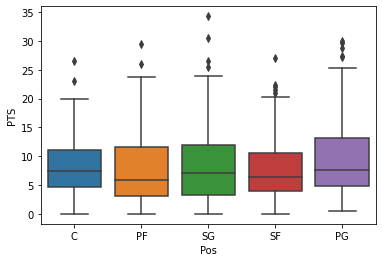

In [42]:
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS) 

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

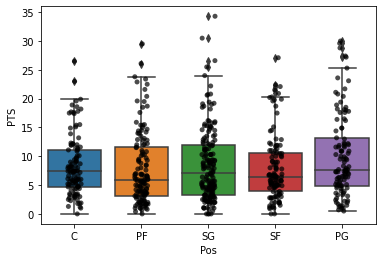

In [45]:
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS) 
sns.stripplot(x = 'Pos', y = 'PTS', data = PTS,
              jitter=True, 
              marker='o',
              alpha=0.7, 
              color="black")

## Heatmap

### Correlation matrix

In [46]:
corr = df.corr()
corr

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.112074,0.086981,0.187944,0.093014,0.111467,-0.012770,0.206767,0.203697,0.153164,...,0.092365,0.012826,0.145914,0.113539,0.157002,0.119281,0.056369,0.086540,0.120923,0.111290
G,0.112074,1.000000,0.634800,0.632346,0.520625,0.502973,0.241420,0.412623,0.392584,0.297786,...,0.350294,0.289908,0.458982,0.435172,0.397120,0.429177,0.269456,0.408157,0.437002,0.514799
GS,0.086981,0.634800,1.000000,0.769980,0.712433,0.697719,0.175034,0.488025,0.486009,0.189690,...,0.227115,0.390371,0.632457,0.596061,0.552719,0.549143,0.351951,0.618530,0.551070,0.706195
MP,0.187944,0.632346,0.769980,1.000000,0.880861,0.888803,0.201169,0.690791,0.700254,0.322447,...,0.390727,0.410920,0.733633,0.678810,0.688403,0.722303,0.397804,0.770935,0.737966,0.881214
FG,0.093014,0.520625,0.712433,0.880861,1.000000,0.975769,0.275202,0.660079,0.662039,0.283863,...,0.315092,0.431840,0.716891,0.672578,0.711258,0.617060,0.391933,0.844707,0.618267,0.988500
FGA,0.111467,0.502973,0.697719,0.888803,0.975769,1.000000,0.124488,0.750946,0.771815,0.308611,...,0.337838,0.302011,0.649347,0.582635,0.744636,0.627226,0.299843,0.849331,0.578788,0.982872
FG%,-0.012770,0.241420,0.175034,0.201169,0.275202,0.124488,1.000000,-0.067673,-0.141142,0.115910,...,0.110507,0.481782,0.329254,0.393503,0.058788,0.088195,0.375639,0.169142,0.333590,0.222546
3P,0.206767,0.412623,0.488025,0.690791,0.660079,0.750946,-0.067673,1.000000,0.976981,0.493476,...,0.349431,-0.135990,0.306417,0.192675,0.536755,0.443822,0.007820,0.540046,0.356086,0.723893
3PA,0.203697,0.392584,0.486009,0.700254,0.662039,0.771815,-0.141142,0.976981,1.000000,0.421138,...,0.342776,-0.143039,0.317364,0.198637,0.563553,0.464486,0.014133,0.571961,0.364801,0.728147
3P%,0.153164,0.297786,0.189690,0.322447,0.283863,0.308611,0.115910,0.493476,0.421138,1.000000,...,0.298185,-0.116740,0.100951,0.042843,0.229188,0.190777,-0.016531,0.188398,0.148462,0.305936


<AxesSubplot:>

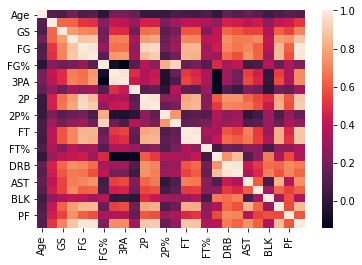

In [47]:
sns.heatmap(corr)

<AxesSubplot:>

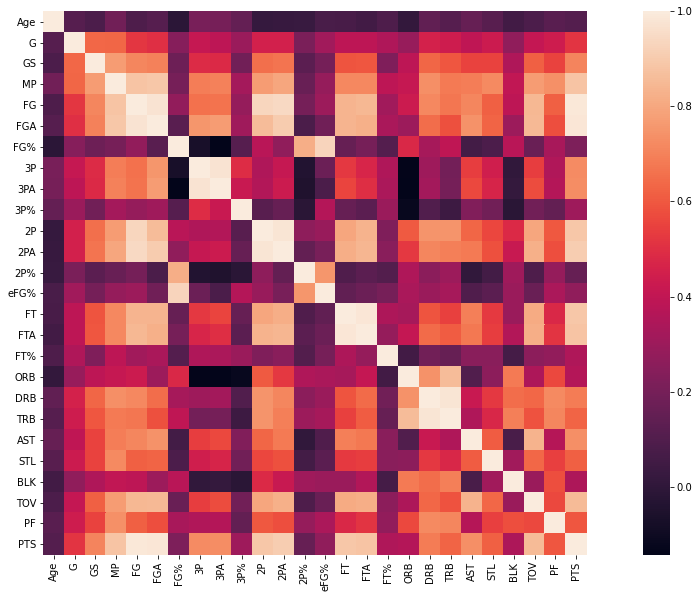

In [49]:
plt.subplots(figsize=(20, 10))
sns.heatmap(corr, square=True)

## Scatter Plot

In [50]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,0.500,...,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
647,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,0.524,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
648,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,0.250,...,0.000,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
649,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,0.569,...,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


### Show df of numerical data only

In [52]:
number = df.select_dtypes(include=['number'])
number

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,26,63,63,26.7,4.5,7.6,0.592,0.0,0.0,0.333,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,22,72,72,33.6,6.1,11.0,0.557,0.0,0.2,0.143,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,34,53,53,33.1,7.4,15.0,0.493,1.2,3.0,0.389,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,23,2,0,6.5,0.5,1.0,0.500,0.0,0.0,0.000,...,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,21,47,1,12.6,2.1,5.7,0.368,1.0,2.8,0.346,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,21,60,60,35.3,9.1,20.8,0.437,3.4,9.5,0.361,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
647,27,58,39,23.1,4.3,8.3,0.524,0.3,1.3,0.240,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
648,30,2,0,2.0,0.5,2.0,0.250,0.0,0.0,0.000,...,0.000,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
649,23,22,0,10.0,1.9,3.3,0.569,0.0,0.0,0.000,...,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [53]:
number.iloc[:,1:6]

,G,GS,MP,FG,FGA
0,63,63,26.7,4.5,7.6
1,72,72,33.6,6.1,11.0
2,53,53,33.1,7.4,15.0
3,2,0,6.5,0.5,1.0
4,47,1,12.6,2.1,5.7
...,...,...,...,...,...
646,60,60,35.3,9.1,20.8
647,58,39,23.1,4.3,8.3
648,2,0,2.0,0.5,2.0
649,22,0,10.0,1.9,3.3


In [55]:
columns = ['Age','AST','STL','BLK','TOV','PTS']
new_df = df[columns]
new_df

,Age,AST,STL,BLK,TOV,PTS
0,26,2.3,0.8,1.1,1.5,10.9
1,22,5.1,1.1,1.3,2.8,15.9
2,34,2.4,0.7,1.6,1.4,18.9
3,23,0.0,0.0,0.0,0.5,1.0
4,21,1.9,0.4,0.2,1.1,5.7
...,...,...,...,...,...,...
646,21,9.3,1.1,0.1,4.8,29.6
647,27,1.5,0.7,0.4,1.3,11.1
648,30,0.0,0.0,0.0,0.0,1.0
649,23,0.3,0.3,0.2,0.5,4.4


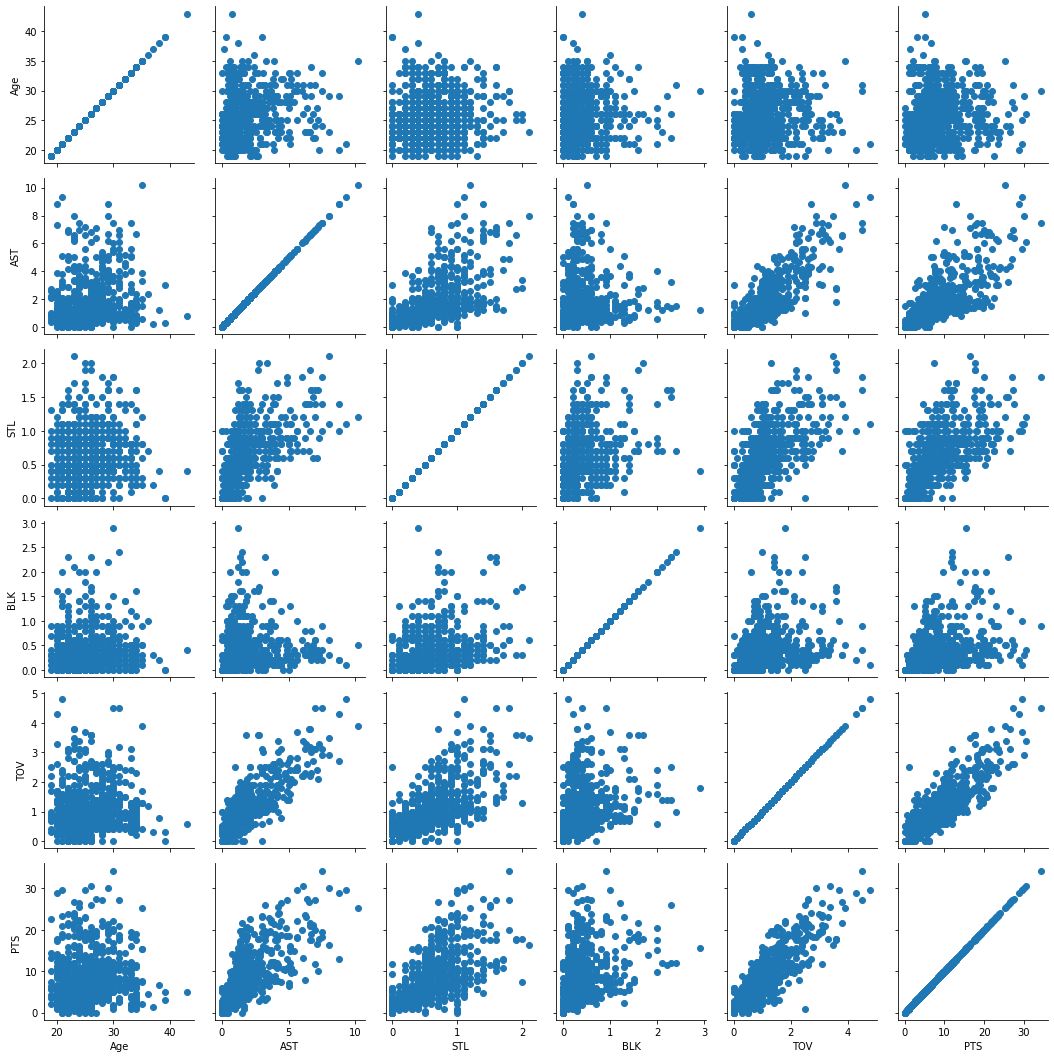

In [57]:
sns.PairGrid(new_df).map(plt.scatter)

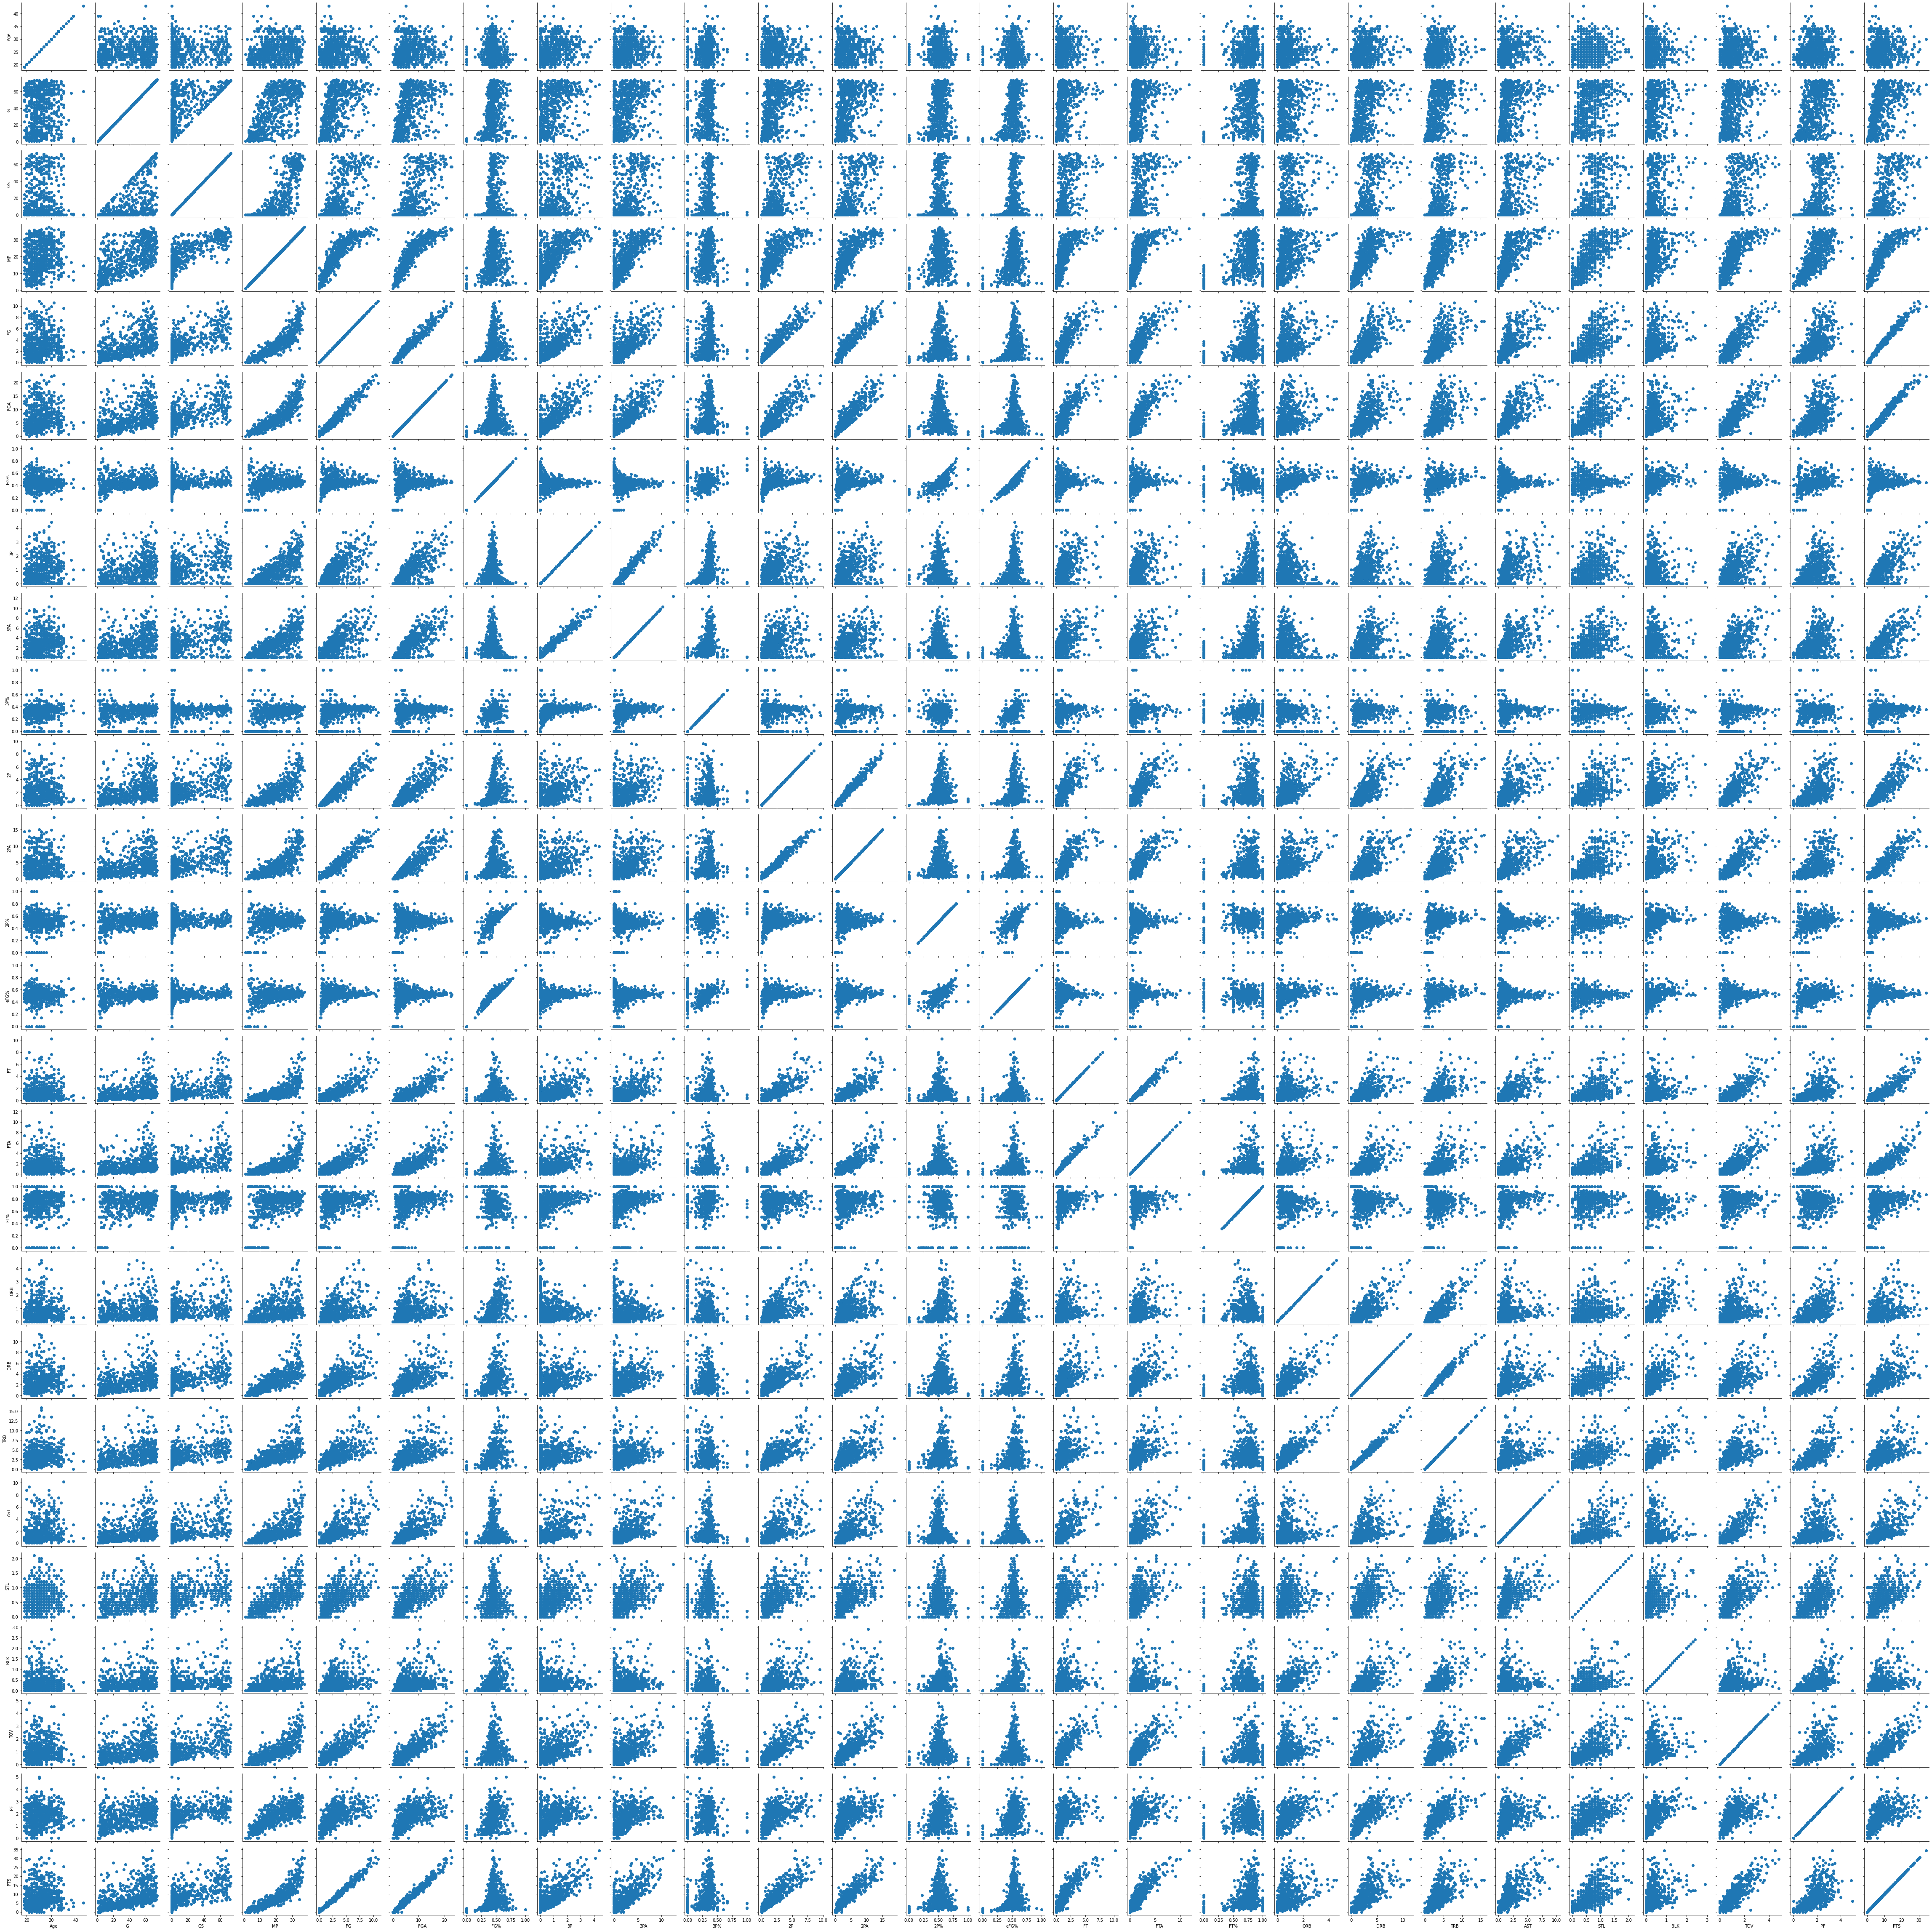

In [58]:
sns.PairGrid(number).map(plt.scatter)

# Thank You :)